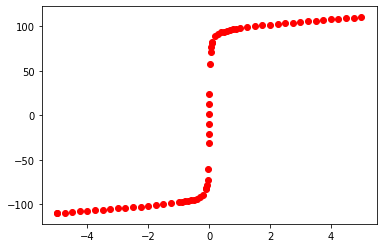

Figure 1: plot of data
[[Variables]]
    MSFe:   95.4518102 +/- 0.48850716 (0.51%) (init = 100)
    mu:     12.2390651 +/- 0.26316325 (2.15%) (init = 12)
    sigma:  0.11389613 +/- 0.02360509 (20.73%) (init = 0.1)
    b:      3.19173272 +/- 0.17113094 (5.36%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(mu, sigma)   = -0.947
    C(MSFe, b)     = -0.838
    C(MSFe, mu)    = -0.658
    C(mu, b)       =  0.526
    C(MSFe, sigma) =  0.490
    C(sigma, b)    = -0.385


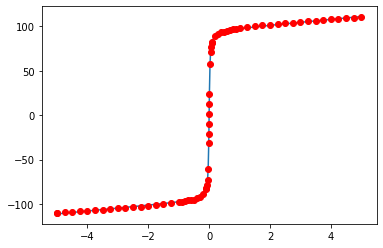

Figure A.1: plot of data and fit with linear scaling (least-squares fit)


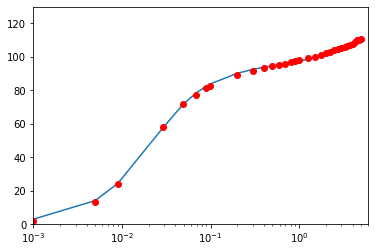

Figure A.2: plot of data and fit with logarithmic field axis (least-squares fit)


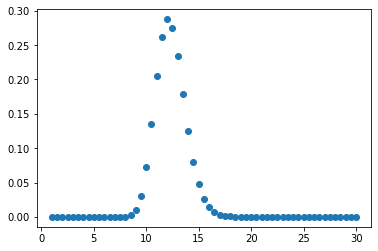

Figure A.3: lognormal distribution of the particle size (least-squares fit)


In [10]:
# In this notebook the size distribution is extracted from the isothermal magnetization measurement 
# of a sample of superparamagnetic core-shell iron oxide nanoparticles (surrounded by a silica)
# by assuming (i) a lognormal distribution of the core size and (ii) a homogeneous magnetization,
# and by fitting the data with the Langevin function using a Bayesian approach.
# The results are published in: 
# "The benefits of a Bayesian analysis for the characterization of magnetic nanoparticles"
# https://arxiv.org/abs/2005.09325

#==============================================================================
# Import of used packages

import numpy as np
import lmfit as lm
import matplotlib.pyplot as plt
import corner
import emcee

#==============================================================================
# Import of the data

B,m=np.genfromtxt("../data/Magnetization_data.txt", unpack=True, usecols = (0, 1), skip_header=0, skip_footer=0) 

sd=0.1*np.sqrt(abs(m)) # Standard error of measurement is much lower than actual measurement uncertainty. 
                       # Here, we assume 0.1*np.sqrt(abs(m)) to be a reasonable estimate for sigma.

#==============================================================================
# Plot of the data

plt.errorbar(B,m,sd, color='r', marker='o', ls='None', label='Observed')
plt.show()
print('Figure 1: plot of data')

#==============================================================================
# Definition of the fitting function

k = 1.381e-23 # Boltzman constant [J/K]
T0 = 300. # Temperature [K]
rho = 4860. # Density of iron oxide [kg/m^3]
Wscale = 0.7 # Weight percentage iron in the iron oxide

def MS(MSFe): # saturation magnetization in [A/m]
    return MSFe*rho*Wscale

def lognor(d,sigma,mu): # lognormal distribution
    return 1./(np.sqrt(2.*np.pi)*sigma*d)*np.exp(-0.5*pow((np.log(d)-np.log(mu))/sigma,2))

def V(d): # particle volume
    return 1./6.*np.pi*pow(d,3)*pow(10,-27)

def xi(B,d,MSFe): # Langevin parameter
    return B*MS(MSFe)*V(d)/(k*T0) 

def L(B,d,MSFe): # Langevin function
    return (1./np.tanh(xi(B,d,MSFe))-1./xi(B,d,MSFe))   

def model1(B,d,sigma,mu,MSFe): # superposition of Langevin functions
    return lognor(d,sigma,mu)*MS(MSFe)*V(d)*L(B,d,MSFe)

def model2(d,sigma,mu,MSFe): # to normalize the integral model1
    return lognor(d,sigma,mu)*MS(MSFe)*V(d)   

d = np.linspace(1,30,59) # bins of particle size distribution in [nm]

def residuals(params): # fitting function which will be minimized; normalized to sigma
    MSFe = params['MSFe'].value
    mu = params['mu'].value
    sigma = params['sigma'].value
    b = params['b'].value

    model = MSFe * np.trapz(model1(B[:, np.newaxis], d[np.newaxis, :], sigma, mu, MSFe), x=d) / np.trapz(model2(d[np.newaxis, :], sigma, mu, MSFe), x=d) + b*B 

    return (model-m)/sd

params = lm.Parameters() # introduction of fitting parameters. lmfit allows to set priors/boundaries
params.add('MSFe', value=100.0, vary=True, min=0.) # saturation magnetization in [Am^2/kg_Fe]
params.add('mu', value=12., vary=True, min=0.) # median value of the particle size (log-normal) distribution in [nm]
params.add('sigma', value=0.1, vary=True, min=0.) # broadness of the particle size (log-normal) distribution
params.add('b', value=2., vary=True, min=0.) # slope of paramagnetic contribution             

#==============================================================================
#==============================================================================
# A) Standard least-squares fit
#==============================================================================
#==============================================================================
# A.1) Fit of data

res1 = lm.minimize(residuals, params, method='leastsq') # leastsq = Levenberg-Marquardt
lm.report_fit(res1.params)

Fit1=m+res1.residual*sd # fit curve

#==============================================================================
# A.2) Plot of results

plt.errorbar(B,m,sd, color='r', marker='o', ls='None', label='Observed')
plt.plot(B,Fit1)
plt.show()
print('Figure A.1: plot of data and fit with linear scaling (least-squares fit)')

plt.errorbar(B,m,sd, color='r', marker='o', ls='None', label='Observed')
plt.plot(B,Fit1)
plt.axis([0.001,6,0,130])
plt.xscale('log')
plt.show()
print('Figure A.2: plot of data and fit with logarithmic field axis (least-squares fit)')

plt.plot(d,lognor(d,res1.params['sigma'].value,res1.params['mu'].value),'o')
plt.show()
print('Figure A.3: lognormal distribution of the particle size (least-squares fit)')

100%|██████████████████████████████████████| 1000/1000 [00:44<00:00, 22.58it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 33.17161448  34.34180562  35.58893921  33.37134446]
[[Variables]]
    MSFe:   95.4285130 +/- 0.27230898 (0.29%) (init = 95.45181)
    mu:     12.2588270 +/- 0.14952314 (1.22%) (init = 12.23907)
    sigma:  0.11237384 +/- 0.01375876 (12.24%) (init = 0.1138961)
    b:      3.19670482 +/- 0.09256165 (2.90%) (init = 3.191733)
[[Correlations]] (unreported correlations are < 0.100)
    C(mu, sigma)   = -0.943
    C(MSFe, b)     = -0.837
    C(MSFe, mu)    = -0.659
    C(mu, b)       =  0.524
    C(MSFe, sigma) =  0.483
    C(sigma, b)    = -0.377


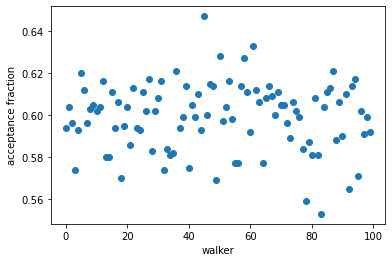

Figure B.1: Acceptance fraction for each walker (should be around 0.5)


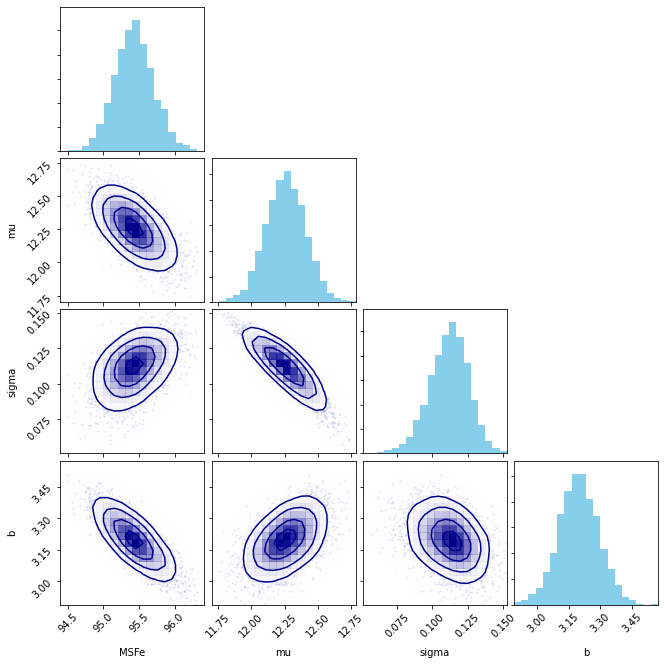

Figure B.2: corner plot of the parameter distributions and cross correlations (Bayes fit)


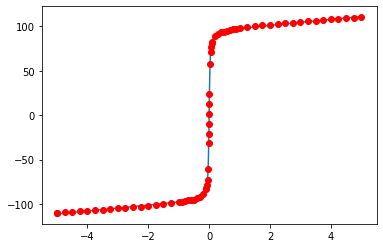

Figure B.3: plot of data and fit with linear scaling (Bayes fit)


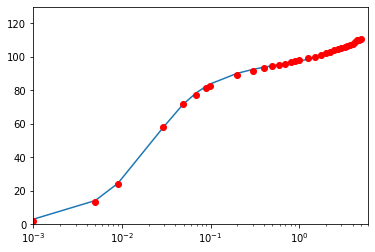

Figure B.4: plot of data and fit with logarithmic field axis (Bayes fit)


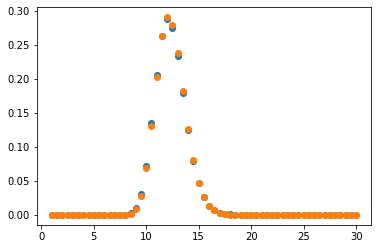

Figure B.5: Comparison of particle size distribution determined by least-squares fit (blue) and the Bayes fit (orange)


In [11]:
#==============================================================================
#==============================================================================
# B) Bayes fit
#==============================================================================
#==============================================================================
# B.1) Fit of data

nwalkers=100 # should be set that it is much larger than number of parameters/variables. 100 is default
steps=1000 # number of samples you would like to draw from the posterior distribution for each of the walkers
burn=300 # Discard this many samples from the start of the sampling regime.
thin=20 # Only accept 1 in every thin samples.
params=res1.params # we use the fit results of the leastsq fit as starting values for the refinement

res2 = lm.minimize(residuals, method='emcee', nan_policy='omit', nwalkers=nwalkers, steps=steps, burn=burn, thin=thin, 
                   params=params, is_weighted=True, progress=True)
lm.report_fit(res2.params)

Fit2 = m+res2.residual*sd # fit curve

#==============================================================================
# B.2) Plot of results

plt.plot(res2.acceptance_fraction,'o')
plt.xlabel('walker')
plt.ylabel('acceptance fraction')
plt.show()
print('Figure B.1: Acceptance fraction for each walker (should be around 0.5)')

# corner plot
emcee_plot = corner.corner(res2.flatchain, labels=res2.var_names, color ='darkblue', truth_color='black',
                           smooth=True,hist_kwargs=dict(histtype='stepfilled', color='skyblue'))
plt.show()
print('Figure B.2: corner plot of the parameter distributions and cross correlations (Bayes fit)')

plt.errorbar(B,m,sd, color='r', marker='o', ls='None', label='Observed')
plt.plot(B,Fit2)
plt.show()
print('Figure B.3: plot of data and fit with linear scaling (Bayes fit)')

plt.errorbar(B,m,sd, color='r', marker='o', ls='None', label='Observed')
plt.plot(B,Fit2)
plt.axis([0.001,6,0,130])
plt.xscale('log')
plt.show()
print('Figure B.4: plot of data and fit with logarithmic field axis (Bayes fit)')

plt.plot(d,lognor(d,res1.params['sigma'].value,res1.params['mu'].value),'o')
plt.plot(d,lognor(d,res2.params['sigma'].value,res2.params['mu'].value),'o')
plt.show()
print('Figure B.5: Comparison of particle size distribution determined by least-squares fit (blue) and the Bayes fit (orange)')

In [12]:
highest_prob = np.argmax(res2.lnprob) # taken from https://lmfit.github.io/lmfit-py/fitting.html
hp_loc = np.unravel_index(highest_prob, res2.lnprob.shape)
mle_soln = res2.chain[hp_loc]

for i, par in enumerate(params):
    if i<len(mle_soln):
        params[par].value = mle_soln[i]

print('\nMaximum Likelihood Estimation from emcee       ')
print('-------------------------------------------------')
print('Parameter  MLE Value   Median Value   Uncertainty')
fmt = '  {:5s}  {:11.5f} {:11.5f}   {:11.5f}'.format
for name, param in params.items():
    if res2.params[name].stderr !=None:
        print(fmt(name, param.value, res2.params[name].value,
              res2.params[name].stderr))


Maximum Likelihood Estimation from emcee       
-------------------------------------------------
Parameter  MLE Value   Median Value   Uncertainty
  MSFe      95.45127    95.42851       0.27231
  mu        12.21963    12.25883       0.14952
  sigma      0.11577     0.11237       0.01376
  b          3.19615     3.19670       0.09256
